In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def imshow(img):
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [48]:
def cv2_show(caption, im):
    cv2.imshow(caption,im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [49]:
def hist_img_v0(f):
    m, n = f.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[f[i, j]]+=1
    return np.array(h, dtype='uint16')

In [50]:
def intermean(hist, t):
    tot = np.sum(hist)
    prob = hist/tot
    w0 = np.sum(prob[:t+1]) + 0.0000001
    #w1 = np.sum(prob[t+1:])
    w1 = (1 - w0) + 0.0000001
    i0 = np.array([i for i in range(0,t+1)])
    i1 = np.array([i for i in range(t+1, 256)])
    u0 = np.sum(i0*prob[:t+1])/w0
    u1 = np.sum(i1*prob[t+1:])/w1
    if u0 == 0.0:
        thr = u1
    elif u1 == 0.0:
        thr = u0
    else:
        thr = (u0+u1)/2
    return thr.astype(np.uint8)

In [51]:
def gamma_correction(img, gamma):
    img = img.astype(np.float64)/np.amax(img)
    gamma_img = img**gamma
    return np.array(255*gamma_img, dtype = 'uint8')

In [52]:
def adaptiveThreshold(image, block_size, c):
    m, n = image.shape
    result_image = np.zeros_like(image)

    for y in range(m):
        for x in range(n):
            x1 = max(0, x - block_size // 2)
            x2 = min(n, x + block_size // 2)
            y1 = max(0, y - block_size // 2)
            y2 = min(m, y + block_size // 2)
            mean = np.mean(image[y1:y2, x1:x2])
            if image[y, x] > mean - c:
                result_image[y, x] = 255
            else:
                result_image[y, x] = 0
    return result_image

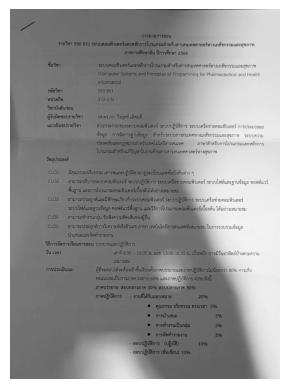

In [53]:
img = cv2.imread('./images/document.jpg', 0)
imshow(img)

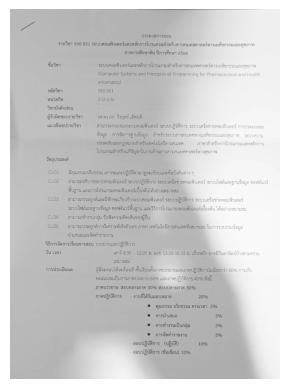

In [54]:
gamma = gamma_correction(img, 0.4)
imshow(gamma)

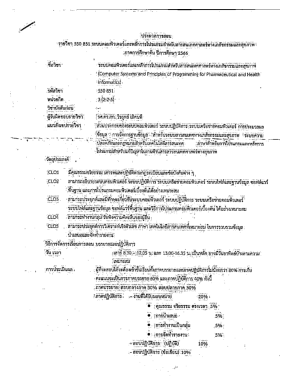

In [55]:
out = adaptiveThreshold(gamma, 11, 2)
imshow(out)

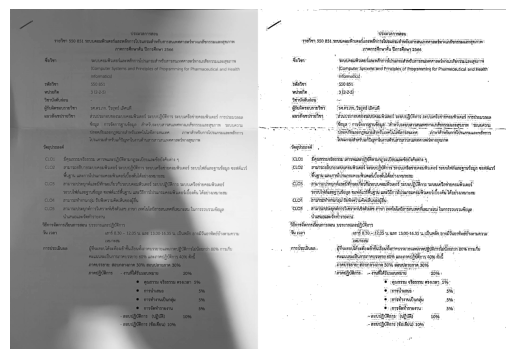

In [56]:
result = cv2.hconcat([img, out])
imshow(result)
plt.savefig('./outs/hw2_adaptive.png')